# Mother machine simulations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from SyMBac.simulation import Simulation
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import Renderer
from SyMBac.PSF import Camera
from SyMBac.misc import get_sample_images
real_image = get_sample_images()["E. coli 100x"]

In [21]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.5,
    cell_max_length=7.65, #6, long cells # 1.65 short cells
    cell_width= 1., #1 long cells # 0.95 short cells
    sim_length = 150,
    pix_mic_conv = 0.065,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.,
    width_var = 0.,
    lysis_p = 0.00,
    save_dir="/tmp/test/",
    resize_amount = 3
)

In [22]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/152 [00:00<?, ?it/s]

In [23]:
my_simulation.draw_simulation_OPL(do_transformation=False, label_masks=True)
my_simulation.visualise_in_napari()

Extracting cell properties from the simulation:   0%|          | 0/150 [00:00<?, ?it/s]

Rendering cell optical path lengths:   0%|          | 0/150 [00:00<?, ?it/s]

In [24]:
from SyMBac.lineage import Lineage

In [25]:
my_lineage = Lineage(my_simulation)

In [26]:
my_lineage.temporal_lineage_graph

In [27]:
my_lineage.family_tree_graph

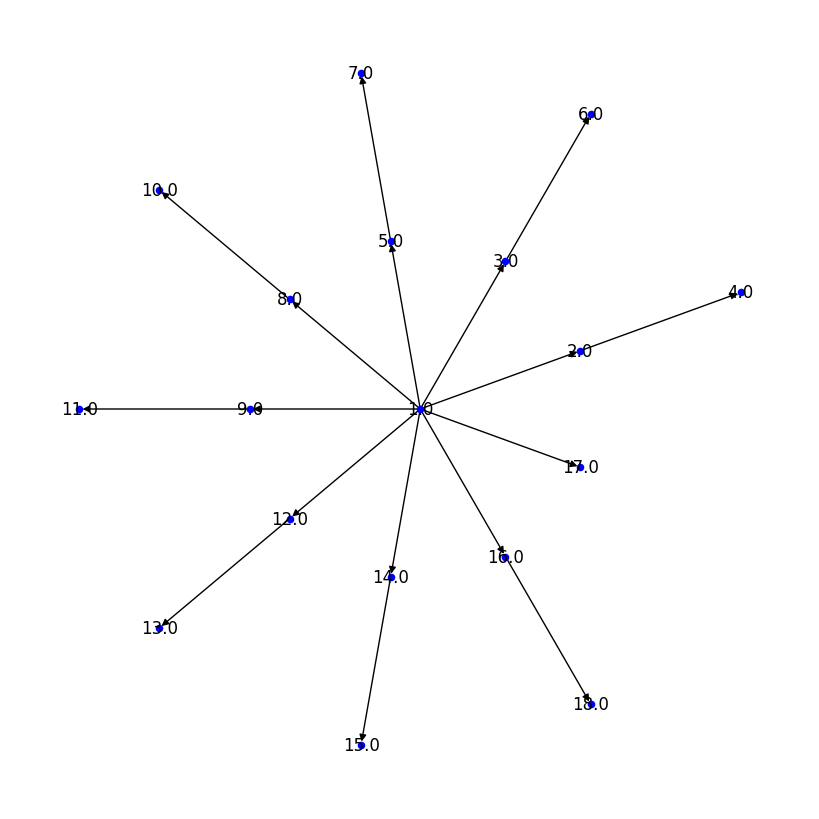

In [28]:
my_lineage.plot_family_tree()

This method takes two arguments. 

- *do_transformation* - Whether or not to bend or morph the cells to increase realism.
- *label_masks* - This controls whether the output training masks will be binary or labeled. Binary masks are used to train U-net (e.g DeLTA), wheras labeled masks are used to train Omnipose

## Point spread function (PSF) generation

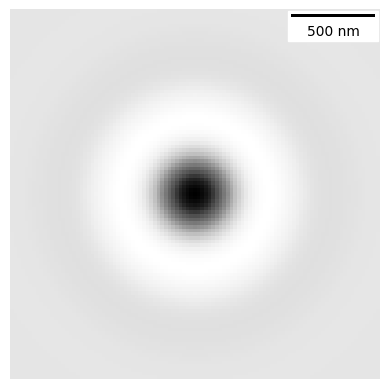

In [29]:
# A phase contrast kernel
my_kernel = PSF_generator(
    radius = 50, 
    wavelength = 0.65, 
    NA = 1.4, 
    n = 1.51, 
    resize_amount = 3, 
    pix_mic_conv = 0.065, 
    apo_sigma = 20, 
    mode="phase contrast", 
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

## Camera model

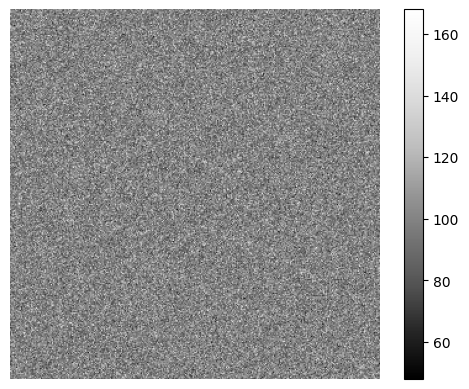

In [30]:
my_camera = Camera(baseline=100, sensitivity=2.9, dark_noise=8)
my_camera.render_dark_image(size=(300,300));

In [31]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image, camera = my_camera, additional_real_images = [real_image])

3 (1404, 220)


In [32]:
my_renderer.select_intensity_napari()

In [33]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(FloatSlider(value=1.0, description='media_multiplier', max=1.0, step=0.01), FloatSlider(…

In [34]:
my_renderer.generate_training_data(sample_amount=0., randomise_hist_match=False, randomise_noise_match=False,  burn_in=40, n_samples = 300, save_dir="/home/gh464/symbac_test_output/", in_series=True, prefix="videotest")

Rendering synthetic images: 0it [00:00, ?it/s]

/home/gh464/Documents/GitHub/SyMBac/SyMBac/renderer.py:441: RuntimeWarning: Mean of empty slice.
  simulated_means = np.array([just_media[np.where(just_media)].mean(), just_cells[np.where(just_cells)].mean(),
/home/gh464/miniconda3/envs/SyMBac/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/gh464/Documents/GitHub/SyMBac/SyMBac/renderer.py:443: RuntimeWarning: Degrees of freedom <= 0 for slice
  simulated_vars = np.array([just_media[np.where(just_media)].var(), just_cells[np.where(just_cells)].var(),
/home/gh464/miniconda3/envs/SyMBac/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/gh464/miniconda3/envs/SyMBac/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount